Importing the Libraries

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install xgboost

Data Collection and Processing

In [3]:
calories=pd.read_csv('calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise=pd.read_csv('exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the Data

In [5]:
calories=pd.concat([exercise,calories['Calories']], axis=1)

In [6]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
# Getting no. of rows and columns
calories.shape

(15000, 9)

In [8]:
# Getting info
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
# Checking null values
calories.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [10]:
# Describing the data
calories.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [11]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

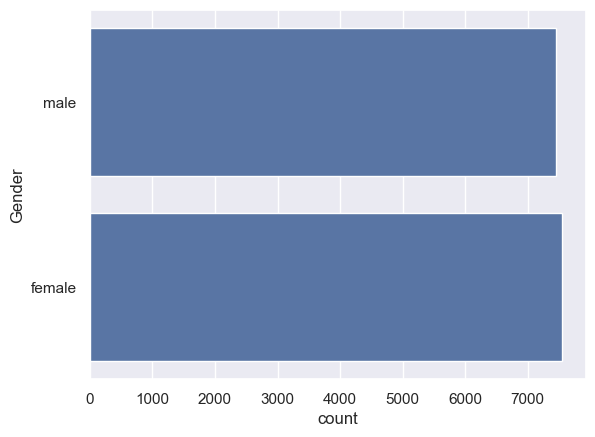

In [12]:
sns.countplot(calories['Gender'])

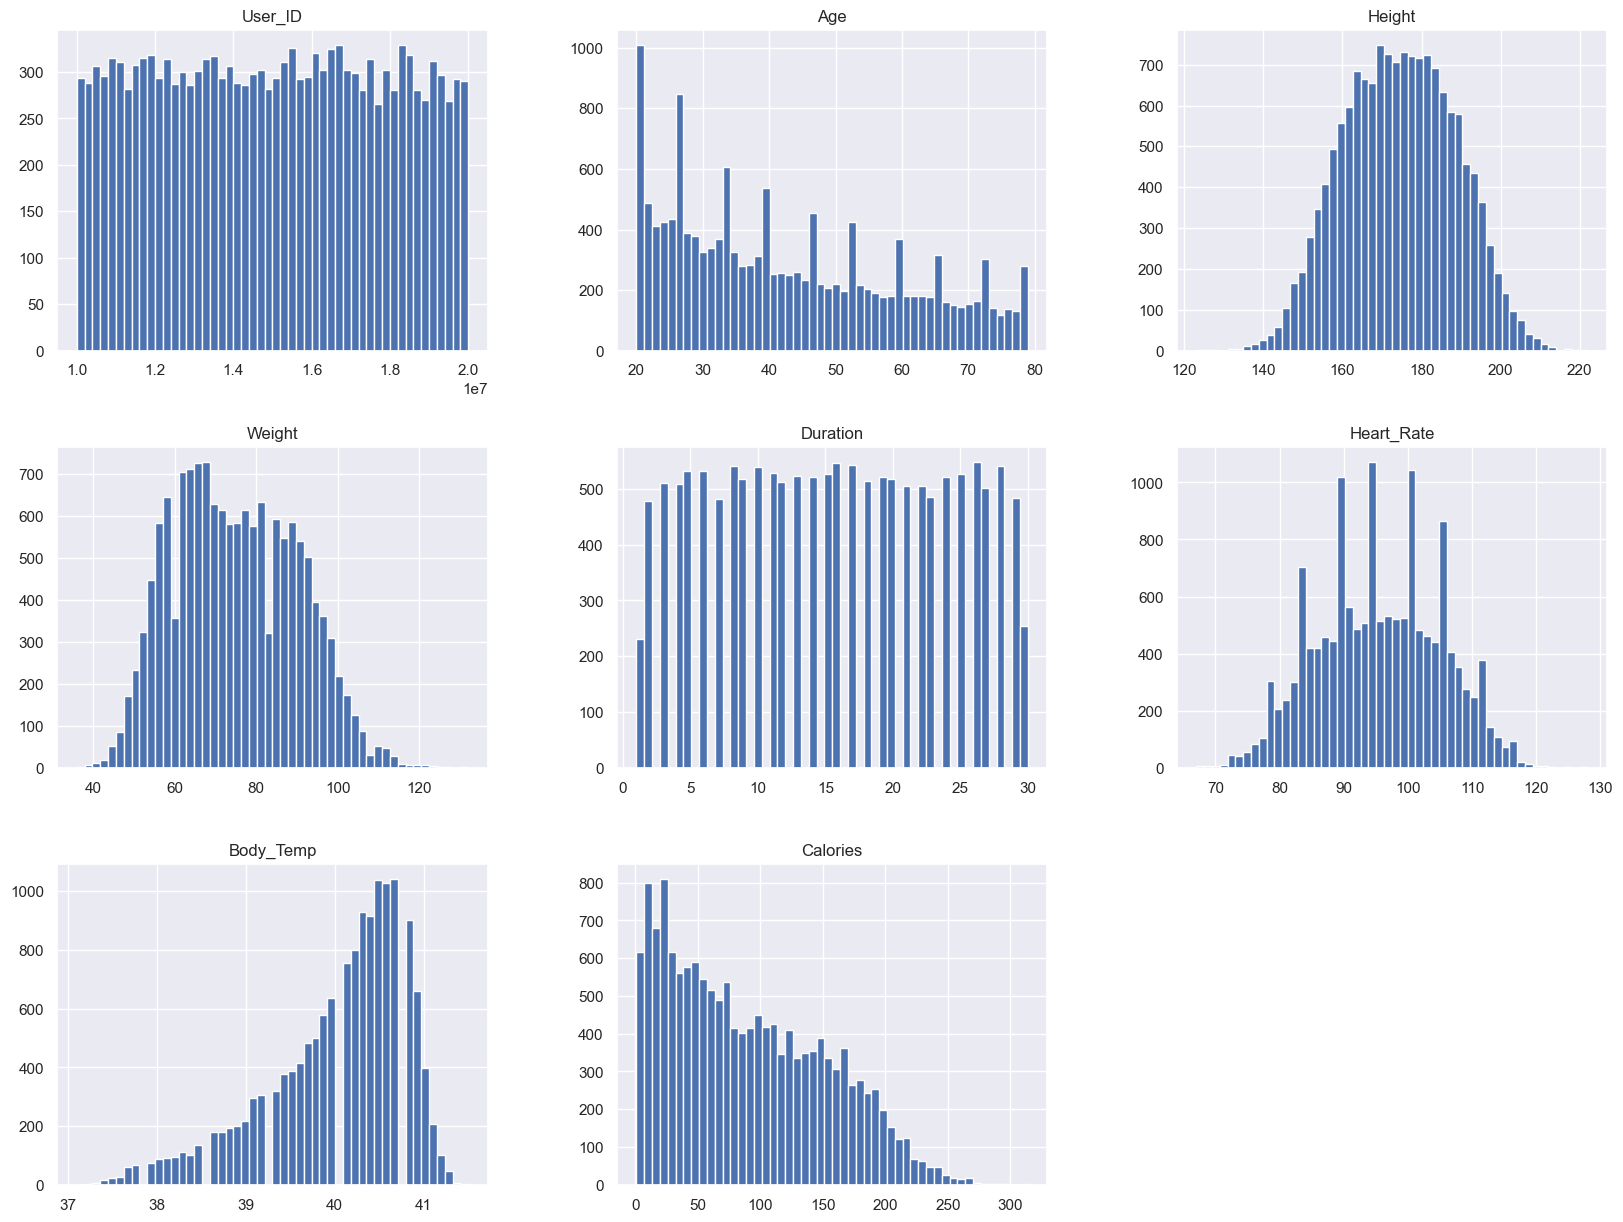

In [13]:
calories.hist(bins=50, figsize=(20, 15))
plt.show()

In [14]:
# Converting text data into numerical values
calories.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [15]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [16]:
# Finding correlation
correlation= calories.corr()

<Axes: >

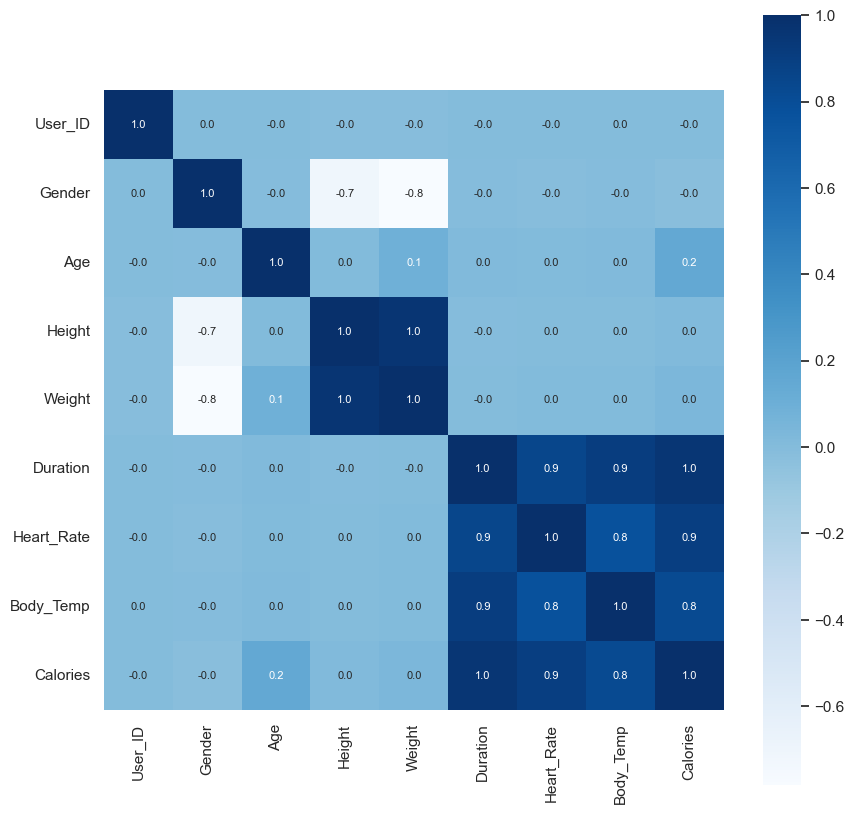

In [17]:
# Heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [18]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [19]:
# Separating features and target
x=calories.drop(columns=['User_ID','Calories'], axis=1)
y=calories['Calories']

In [20]:
x.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [21]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [112]:
# Training and Testing data
from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)

In [23]:
x.shape,x_train.shape,x_test.shape

((15000, 7), (12000, 7), (3000, 7))

In [64]:
# Model Training
from xgboost import XGBRegressor
model= XGBRegressor()

In [65]:
# Training the model
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
# Evaluation
# Prediction on Test data
test_data_prediction= model.predict(x_test)

In [27]:
test_data_prediction

array([125.58828 , 222.11377 ,  38.725952, ..., 144.3179  ,  23.425894,
        90.100494], dtype=float32)

In [28]:
# Mean Absolute error
from sklearn import metrics
mae= metrics.mean_absolute_error(y_test,test_data_prediction)
mae

1.4833678883314132

In [29]:
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()      
X_train=standard_scaler.fit_transform(x_train)  
X_test=standard_scaler.transform(x_test)

In [83]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr=LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)  
lr.fit(x_train,y_train)
model.fit(X_train, y_train)
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [75]:
y_pred=lr.predict(x_test)

In [76]:
y_pred

array([137.49241057, 182.18166512,  50.15864741, ..., 157.56637167,
        16.54924422, 100.21047087])

In [77]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9668790377181355

In [84]:
# Predict on training and test sets
y_pred_lr_train = lr.predict(x_train)
y_pred_lr_test = lr.predict(x_test)

y_pred_model_train = model.predict(X_train)
y_pred_model_test = model.predict(X_test)

y_pred_ridge_train = ridge.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)

y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

In [85]:
# Calculate performance metrics for training data
from sklearn.metrics import mean_squared_error, r2_score
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
r2_lr_train = r2_score(y_train, y_pred_lr_train)

rmse_model_train = np.sqrt(mean_squared_error(y_train, y_pred_model_train))
r2_model_train = r2_score(y_train, y_pred_model_train)

rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)

rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)

In [86]:
# Calculate performance metrics for test data
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
r2_lr_test = r2_score(y_test, y_pred_lr_test)

rmse_model_test = np.sqrt(mean_squared_error(y_test, y_pred_model_test))
r2_model_test = r2_score(y_test, y_pred_model_test)

rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)

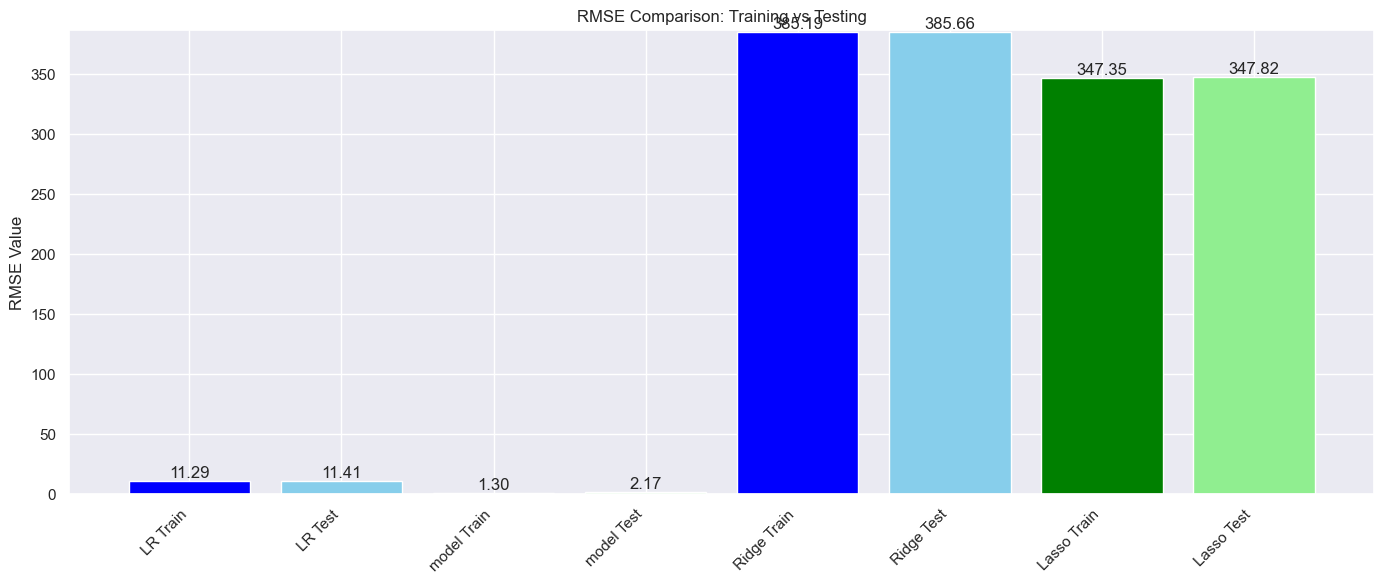

In [102]:
# RMSE Plotting
labels_rmse = ['LR Train', 'LR Test', 'model Train', 'model Test','Ridge Train', 'Ridge Test', 'Lasso Train', 'Lasso Test']

rmse_values = [rmse_lr_train, rmse_lr_test, rmse_model_train, rmse_model_test,rmse_ridge_train, rmse_ridge_test, rmse_lasso_train, rmse_lasso_test]

colors_rmse = ['blue', 'skyblue', 'green', 'lightgreen']

plt.figure(figsize=(14, 6))
bars_rmse = plt.bar(labels_rmse, rmse_values, color=colors_rmse)
plt.title('RMSE Comparison: Training vs Testing')
plt.ylabel('RMSE Value')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(rmse_values) + 1)  # Adjust y-axis limit for better visibility
plt.tight_layout()

# Add value labels on bars
for bar in bars_rmse:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

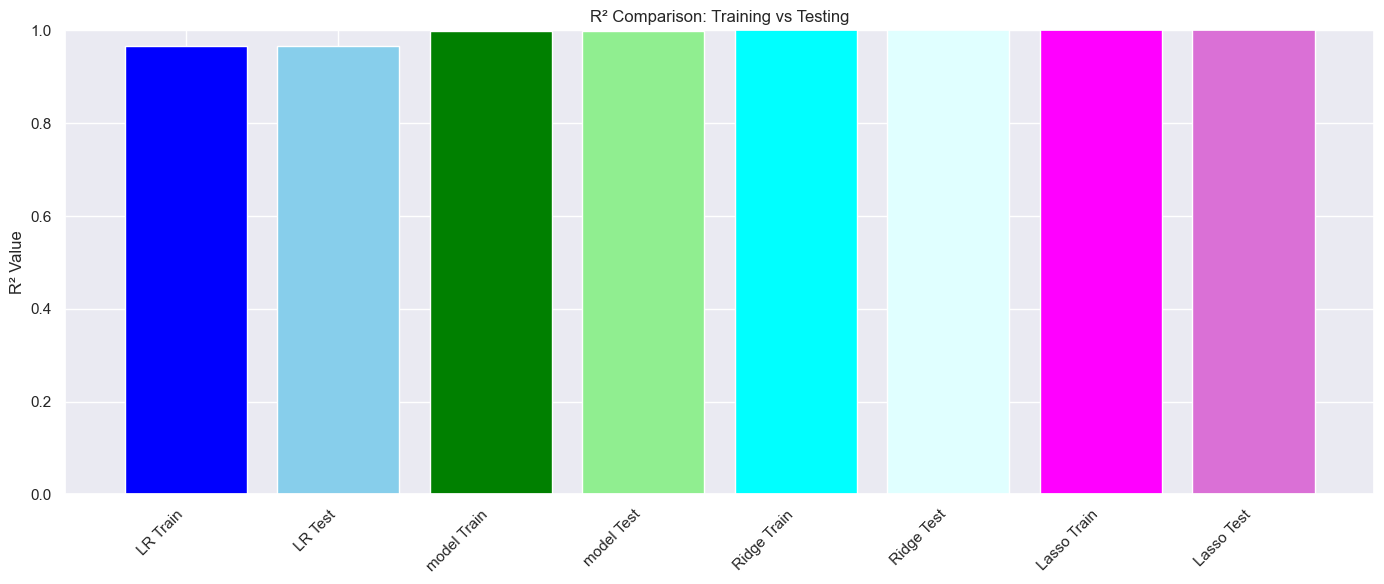

In [110]:
# R² Plotting

labels_r2 = ['LR Train', 'LR Test', 'model Train', 'model Test', 'Ridge Train', 'Ridge Test', 'Lasso Train', 'Lasso Test']

r2_values = [r2_lr_train, r2_lr_test, r2_model_train, r2_model_test, rmse_ridge_train, rmse_ridge_test, rmse_lasso_train, rmse_lasso_test]

colors_r2 = ['blue', 'skyblue', 'green', 'lightgreen', 'cyan', 'lightcyan', 'magenta', 'orchid']

plt.figure(figsize=(14,6))
bars_r2 = plt.bar(labels_r2, r2_values, color=colors_r2)
plt.title('R² Comparison: Training vs Testing')
plt.ylabel('R² Value')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # R² values range from 0 to 1
plt.tight_layout()

# Add value labels on bars

plt.show()

In [114]:
# Define a dictionary to hold cross-validation scores
cv_scores = {
    'Linear Regression': cross_val_score(lr, x, y, cv=5, scoring='r2'),
    'XGboost ': cross_val_score(model, x, y, cv=5, scoring='r2'),
    'Ridge Regression': cross_val_score(ridge, x, y, cv=5, scoring='r2'),
    'Lasso Regression': cross_val_score(lasso, x, y, cv=5, scoring='r2')
}

In [115]:
# Print cross-validation results
for model, scores in cv_scores.items():
    print(f"{model} - Cross-Validation R² Scores: {scores}")
    print(f"{model} - Mean R²: {scores.mean():.4f}")
    print(f"{model} - Standard Deviation: {scores.std():.4f}\n")

Linear Regression - Cross-Validation R² Scores: [0.96712832 0.96658977 0.96769213 0.96828562 0.96606908]
Linear Regression - Mean R²: 0.9672
Linear Regression - Standard Deviation: 0.0008

XGboost  - Cross-Validation R² Scores: [0.99875855 0.99886654 0.99891382 0.99876181 0.9988351 ]
XGboost  - Mean R²: 0.9988
XGboost  - Standard Deviation: 0.0001

Ridge Regression - Cross-Validation R² Scores: [0.96712785 0.96658938 0.9676925  0.96828546 0.96606977]
Ridge Regression - Mean R²: 0.9672
Ridge Regression - Standard Deviation: 0.0008

Lasso Regression - Cross-Validation R² Scores: [0.96701829 0.96646919 0.96764276 0.96825862 0.9660856 ]
Lasso Regression - Mean R²: 0.9671
Lasso Regression - Standard Deviation: 0.0008

